# Kalorimetrie Laborversuch

Author: Vincent Jestädt

Datum: 12.12.23

Gruppe: 14

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch:

Ermittlung der Wärmekapazität verschiedener Proben und des Prüfbehalters in einem Laborprüfstand.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.

In einen Messbehälter mit 400 ml Wasser wird eine zuvor in einem Wasserbecken auf 80°C erhitzte Probe eingesetzt. Die Erwärmung des Wassers im Messbehälter wird über drei Temperatursensoren aufgezeichnet. Weitere Temperatursensoren im Aufheizbecken und der Umgebung liefern die benötigten Referenztemperaturen. 

<img src="figures/Versuchsaufbau_PdD.jpeg" width="800">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib
import json

#from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = 'data/Constant/Constant.h5'

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")
#print(data_dict)
# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])
#print(mean_std_calorimeter)
# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


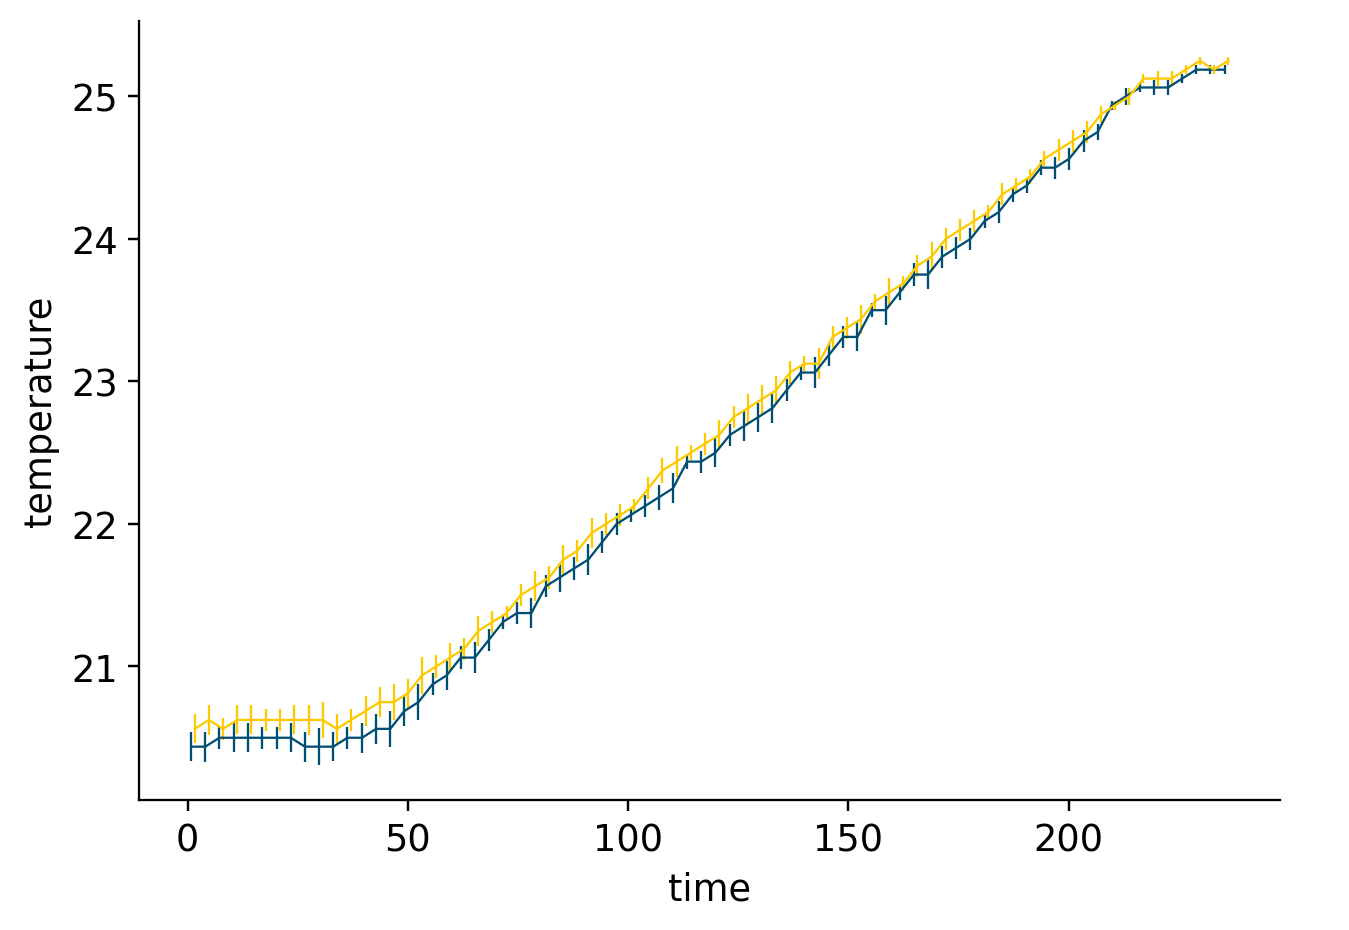

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

# Pfad zur JSON-Datei mit den Metadaten des Calorimeters
path = "data/Constant/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"

# Öffnen der Datei und Laden der Metadaten
with open(path, 'r') as f:
  calorimeter = json.load(f)

# Extrahieren der Wassermasse aus den Metadaten
water_mass = calorimeter["calorimeter"]["medium"]["mass"]["value"]

# Ausgabe der Wassermasse
print('Wassermasse:', water_mass, 'ml')


# DONE #

Wassermasse: 400 ml


In [46]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

# Öffnen der HDF5-Datei im Lesemodus
file = h5.File(datafile_path_const, "r")

# Zugriff auf den "RawData"-Datensatz in der HDF5-Datei
auslese = file["RawData"]

# Extrahieren der UUID (Identifikator) aus dem "RawData"-Datensatz
uuid = list(auslese)[0]

# Zugriff auf die Daten mit der extrahierten UUID
auslese = auslese[uuid]

# Extrahieren der Stromstärke, Heizzeit und Spannung aus den Daten
current = auslese["current"][()]
heat_time = auslese["heat_time"][()]
voltage = auslese["voltage"][()]

# Ausgabe der extrahierten Informationen
print('UUID:', uuid)
print('Stromstärke:', current, 'A')
print('Zeit:', heat_time, 's')
print('Spannung:', voltage, 'V')
# DONE #

UUID: 1ee21744-0355-6023-94b4-d5c041dd32cd
Stromstärke: 4.0 A
Zeit: 180.0 s
Spannung: 12.7 V


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter[0], 0.05) 

#print(temperature_end)
#print(temperature_start)

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter
calorimeter_const = voltage*current*180/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [44]:
print('Kalorimeterkonstante:', calorimeter_const, 'in J/kgK')

Kalorimeterkonstante: 2015.437952014693 in J/kgK


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = 'data/004/004.h5'

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

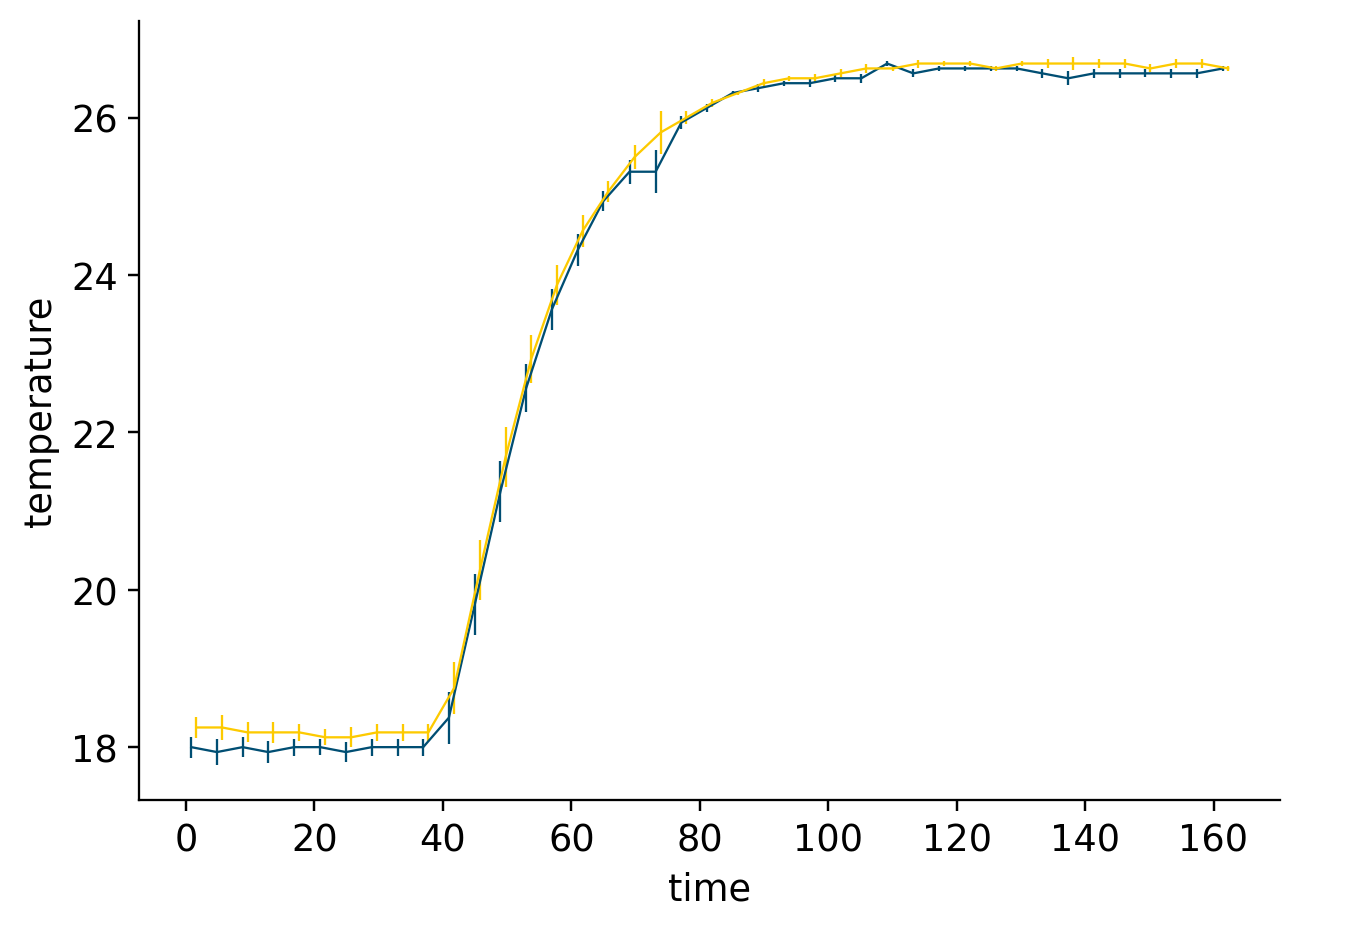

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.

# Pfad zur JSON-Datei mit den Metadaten der Probe
path = "data/004/probe_PDC004_1ee57b2f-bfd6-6c0e-a6ed-d099248c61ab.json"

# Öffnen der Datei und Laden der Metadaten
with open(path, 'r') as f:
    probe = json.load(f)

# Extrahieren der Probenmasse aus den Metadaten
sample_mass = probe["probe"]["mass"]["value"]

# Ausgabe der Probenmasse
print('Probenmasse:', sample_mass, 'g')

# DONE #

Probenmasse: 630 g


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], 0.05) 

#print(temperature_mix)
#print(temperature_start_water)
# DONE #

In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa_004 = calorimeter_const*(temperature_mix-temperature_start_water)/((sample_mass/1000)*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [48]:
print('Wärmekapazität der Probe 004(Edelstahl):', sample_heat_capa_004, 'in J/kgK')

Wärmekapazität der Probe 004(Edelstahl): 509.79145250805436 in J/kgK


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = 'data/011/011.h5'

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")
#print(data_dict)
# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]


# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])
# DONE #

#### (iii) Daten ploten

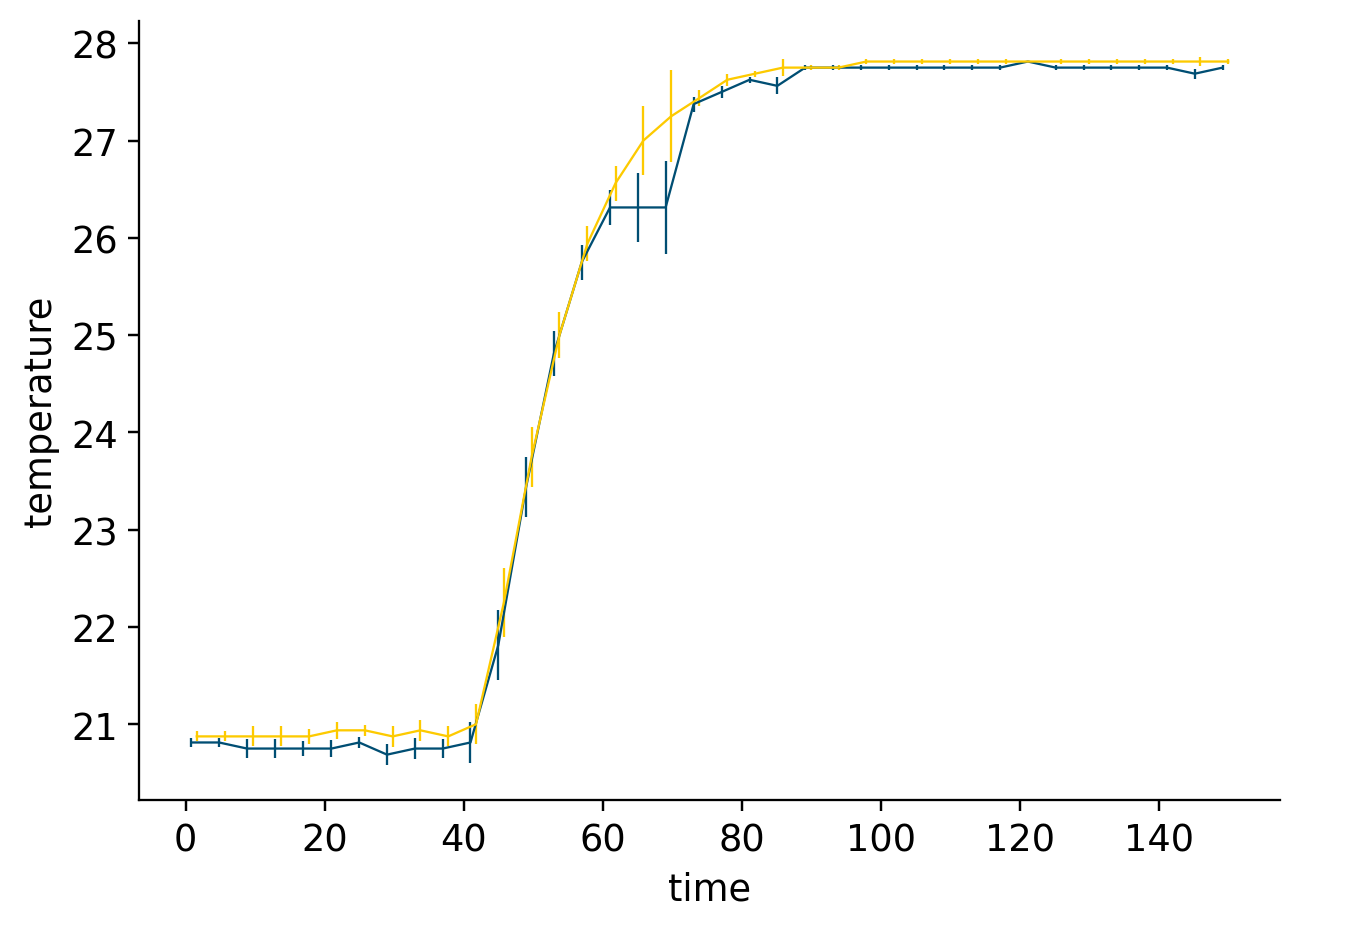

In [26]:
importlib.reload(utility)

#TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

#DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.

# Pfad zur JSON-Datei mit den Metadaten der Probe
path = "data/011/probe_PDC011_1ee57b37-1b00-6b47-b00e-8332e0df15ea.json"

# Öffnen der Datei und Laden der Metadaten
with open(path, 'r') as f:
    probe = json.load(f)

# Extrahieren der Probenmasse aus den Metadaten
sample_mass = probe["probe"]["mass"]["value"]

# Ausgabe der Probenmasse
print('Probenmasse:', sample_mass, 'g')

# DONE #

Probenmasse: 680 g


#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], 0.05)

# DONE #

In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa_011 = calorimeter_const*(temperature_mix-temperature_start_water)/((sample_mass/1000)*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [47]:
print('Wärmekapazität der Probe 011(Messing):', sample_heat_capa_011, 'in J/kgK')

Wärmekapazität der Probe 011(Messing): 393.06311857065754 in J/kgK


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = 'data/021/021.h5'

# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]


# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])
# DONE #

#### (iii) Daten ploten

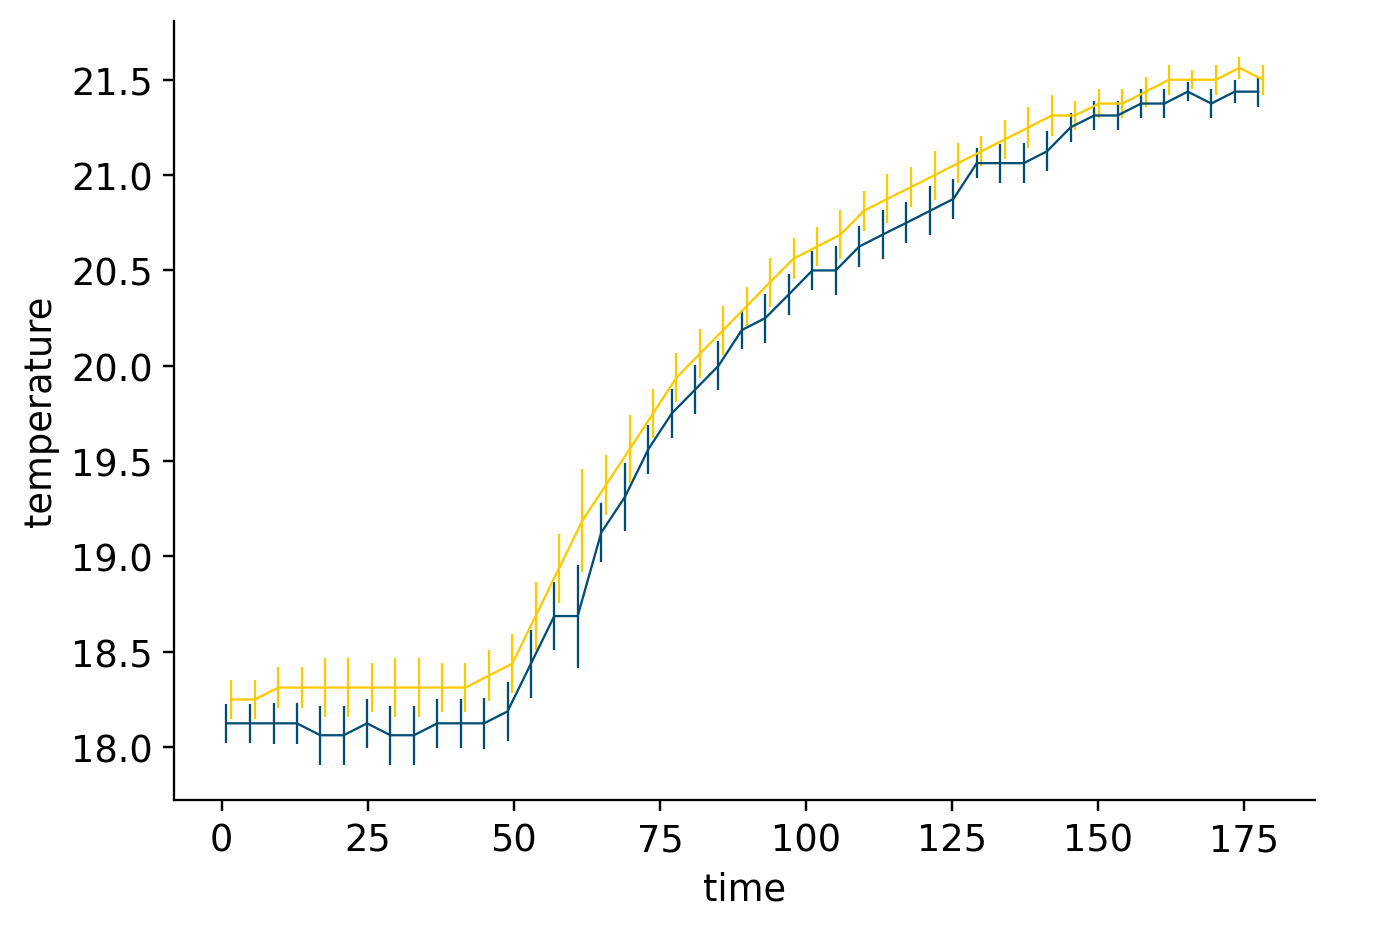

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.

# Pfad zur JSON-Datei mit den Metadaten der Probe
path = "data/021/probe_PDC021_1ee7d43e-ed51-67b7-aaf7-4039bdd3ee1e.json"

# Öffnen der Datei und Laden der Metadaten
with open(path, 'r') as f:
    probe = json.load(f)

# Extrahieren der Probenmasse aus den Metadaten
sample_mass = probe["probe"]["mass"]["value"]

# Ausgabe der Probenmasse
print('Probenmasse:', sample_mass, 'g')

# DONE #

Probenmasse: 380 g


#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], 0.05) 

# DONE #

In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa_021 = calorimeter_const*(temperature_mix-temperature_start_water)/((sample_mass/1000)*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [45]:
print('Wärmekapazität der Probe 021(ABS):', sample_heat_capa_021, 'in J/kgK')

Wärmekapazität der Probe 021(ABS): 289.95707001981555 in J/kgK


## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Die Bestimmung der Wärmekapazität der Messing- und Edelstahlprobe konnte mit einem Fehler unter 4% im Vergleich zu Vergleichswerten erfolgen. Obwohl bei der Messung mit der Edelstahlprobe 12g Wasser mit transportiert wurden, belief sich der Fehler auf 2,2%. Somit hat diese Wassermenge kaum Einfluss auf das Endergebnis. 

Die Bestimmung der Kapazität des ABS jedoch weißt zum Vergleichswert von 1,3 kJ/kgK einen Fehler von 78% auf. Dies könnte an der schlechten Wärmeleitfähigkeit liegen. Eine längere Messdauer könnte dies verbessern. 

Ein weiterer Grund für eine Fehlerpotenzierung könnte die gesetzte Schwelle von 5% in der get_start_end_temperature-Funktion sein. Diese Schwelle könnte man noch weiter senken. 


## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.
Das Versuchsziel wurde größtenteils gut erfüllt. Die Wärmekapazität des Wasserbehälters und zweier Proben konnte mit einem akzeptablen Fehler bestimmt werden.  